In [88]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing import text,sequence
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Activation
from tensorflow.keras.layers import Embedding
from tensorflow.keras.layers import Conv1D,GlobalMaxPooling1D,MaxPooling1D
from sklearn.model_selection import train_test_split
import re    #for regex
import string
from tensorflow import keras
import nltk
nltk.download('stopwords')
from wordcloud import WordCloud

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\TengkaiGao\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [89]:
train = pd.read_csv('G:/toxic_final.csv')

In [90]:
train

,Unnamed: 0,Unnamed: 0.1,comment_text,Toxic
0,0,61,discussion requires both parties to explain th...,0
1,1,40630,avoiding edit wars acroterion i have been tr...,0
2,2,12124,omg i have never thought of it that way pure g...,0
3,3,11380,because of our recent edits to skycable the us...,0
4,4,5844,no harm done i deleted the second comment,0
...,...,...,...,...
41034,41034,43459,new mutants putlocker about to be the google ...,1
41035,41035,43460,it was better than the new mutants there were ...,1
41036,41036,43461,whenever i think that I am truly fast furious...,1
41037,41037,43462,my man was not to happy i left on this harley ...,1


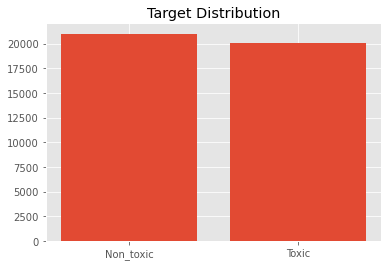

In [91]:
target_count = train.groupby('Toxic').size().reset_index(name='counts')
plt.bar(target_count.Toxic, target_count.counts)
plt.xticks([0,1], labels=["Non_toxic", "Toxic"])
plt.title("Target Distribution")
plt.show()

In [92]:
train['comment_text'] = pd.DataFrame(train["comment_text"].astype('str')) #transfomer to str 

In [116]:
x=train["comment_text"]
y=train["Toxic"]

In [117]:
#Splitting the data into train and test
train_x, test_x, train_y, test_y = train_test_split(x,y, test_size=0.2, random_state=2,shuffle=True)

In [118]:
max_feature = 3000#max feature 3000
tokenizer = tf.keras.preprocessing.text.Tokenizer(max_feature,
                                                  lower= True,
                                                  filters= '!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n',
                                                  split = " ")#tokenizer 

tokenizer.fit_on_texts(train_x)

In [119]:
sequences = tokenizer.texts_to_sequences(train_x)

In [120]:
pad_sequences = tf.keras.preprocessing.sequence.pad_sequences(sequences,
                                                             maxlen = 500)

In [121]:
test_x_tokenized=tokenizer.texts_to_sequences(test_x)
x_testing=tf.keras.preprocessing.sequence.pad_sequences(test_x_tokenized,maxlen=500)

In [122]:
pad_sequences

array([[   0,    0,    0, ...,    3,    2,  116],
       [   0,    0,    0, ...,  448,  221,  139],
       [   0,    0,    0, ...,  666,   42,   91],
       ...,
       [   0,    0,    0, ..., 1049,  111, 1212],
       [   0,    0,    0, ...,    7,    1, 1298],
       [   0,    0,    0, ...,   12,   28,  204]])

In [123]:
model_lstm = tf.keras.Sequential([tf.keras.layers.Embedding(max_feature,64,input_length = 500),
                                 tf.keras.layers.Dropout(0.3),
                                 tf.keras.layers.LSTM(64),
                                 tf.keras.layers.Dropout(0.3),
                                 tf.keras.layers.Dense(1, activation = "sigmoid")]
                                )

model_lstm.summary()

Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_14 (Embedding)     (None, 500, 64)           192000    
_________________________________________________________________
dropout_27 (Dropout)         (None, 500, 64)           0         
_________________________________________________________________
lstm_22 (LSTM)               (None, 64)                33024     
_________________________________________________________________
dropout_28 (Dropout)         (None, 64)                0         
_________________________________________________________________
dense_14 (Dense)             (None, 1)                 65        
Total params: 225,089
Trainable params: 225,089
Non-trainable params: 0
_________________________________________________________________


In [124]:
callback=keras.callbacks.EarlyStopping(monitor='val_loss',min_delta=0, patience=5, verbose=2, mode='auto', restore_best_weights=True)


In [125]:
model_lstm.compile(loss = "binary_crossentropy",
                 optimizer = tf.keras.optimizers.Adam(3e-3),
                 metrics= ["accuracy"])

In [126]:
history = model_lstm.fit(
    pad_sequences,train_y,
    batch_size= 64,
    epochs= 20,
    validation_split= 0.1,
    verbose=1,callbacks=[callback]
)

Epoch 1/20
462/462 [==============================] - 18s 34ms/step - loss: 0.3008 - accuracy: 0.8731 - val_loss: 0.2617 - val_accuracy: 0.8995
Epoch 2/20
462/462 [==============================] - 15s 33ms/step - loss: 0.2148 - accuracy: 0.9167 - val_loss: 0.2231 - val_accuracy: 0.9083
Epoch 3/20
462/462 [==============================] - 15s 33ms/step - loss: 0.1807 - accuracy: 0.9304 - val_loss: 0.2331 - val_accuracy: 0.9056
Epoch 4/20
462/462 [==============================] - 15s 33ms/step - loss: 0.1640 - accuracy: 0.9365 - val_loss: 0.2338 - val_accuracy: 0.9050
Epoch 5/20
462/462 [==============================] - 15s 33ms/step - loss: 0.1501 - accuracy: 0.9410 - val_loss: 0.2413 - val_accuracy: 0.9077
Epoch 6/20
462/462 [==============================] - 15s 33ms/step - loss: 0.1384 - accuracy: 0.9450 - val_loss: 0.2606 - val_accuracy: 0.9053
Epoch 7/20
462/462 [==============================] - 15s 33ms/step - loss: 0.1257 - accuracy: 0.9485 - val_loss: 0.2788 - val_accuracy:

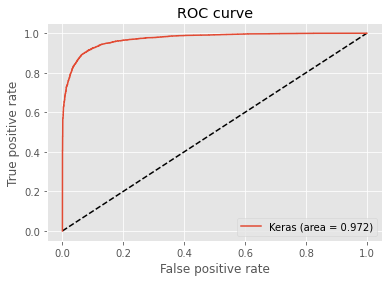

In [127]:
from sklearn.metrics import roc_curve
y_pred=model_lstm.predict(x_testing)
fpr, tpr, thresholds = roc_curve(test_y, y_pred)
from sklearn.metrics import auc
auc_keras = auc(fpr, tpr)
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, label='Keras (area = {:.3f})'.format(auc_keras))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

In [128]:
from sklearn.metrics import roc_curve
from sklearn.metrics import classification_report
import numpy as np
fpr, tpr, thresholds = roc_curve(test_y, y_pred)
y=tpr-fpr
idx=np.argmax(y)#Youden_index
best_threshold=thresholds[idx]
print("The best threshold is",best_threshold)
print(classification_report(test_y, y_pred >best_threshold ,digits=4))

The best threshold is 0.47931874
              precision    recall  f1-score   support

           0     0.9073    0.9265    0.9168      4162
           1     0.9227    0.9026    0.9125      4046

    accuracy                         0.9147      8208
   macro avg     0.9150    0.9145    0.9147      8208
weighted avg     0.9149    0.9147    0.9147      8208



In [129]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')

def plot_history(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    x = range(1, len(acc) + 1)

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(x, acc, 'b', label='Training acc')
    plt.plot(x, val_acc, 'r', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(x, loss, 'b', label='Training loss')
    plt.plot(x, val_loss, 'r', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()

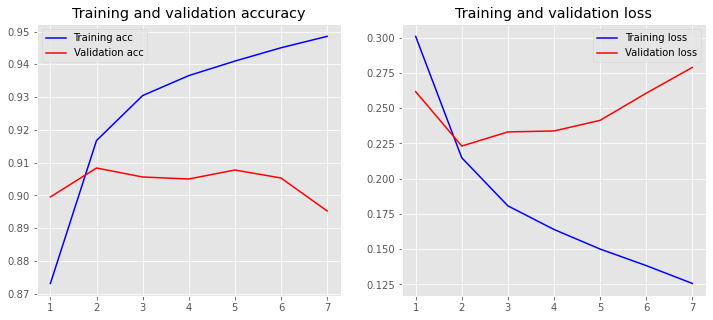

In [130]:
plot_history(history)

In [131]:
model_stack_lstm = tf.keras.Sequential([tf.keras.layers.Embedding(max_feature,64,input_length = 500),
                                tf.keras.layers.Dropout(0.3),
                                 tf.keras.layers.LSTM(64,return_sequences = True),
                                 tf.keras.layers.Dropout(0.3),
                                 tf.keras.layers.LSTM(64),
                                 tf.keras.layers.Dense(1, activation = "sigmoid")]
                                )

model_stack_lstm .summary()

Model: "sequential_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_15 (Embedding)     (None, 500, 64)           192000    
_________________________________________________________________
dropout_29 (Dropout)         (None, 500, 64)           0         
_________________________________________________________________
lstm_23 (LSTM)               (None, 500, 64)           33024     
_________________________________________________________________
dropout_30 (Dropout)         (None, 500, 64)           0         
_________________________________________________________________
lstm_24 (LSTM)               (None, 64)                33024     
_________________________________________________________________
dense_15 (Dense)             (None, 1)                 65        
Total params: 258,113
Trainable params: 258,113
Non-trainable params: 0
_______________________________________________

In [132]:
model_stack_lstm.compile(loss = "binary_crossentropy",
                 optimizer = tf.keras.optimizers.Adam(3e-3),
                 metrics= ["accuracy"])

In [133]:
history = model_stack_lstm.fit(
    pad_sequences,train_y,
    batch_size= 64,
    epochs= 20,
    validation_split= 0.1,
    verbose=1,callbacks=[callback]
)

Epoch 1/20
462/462 [==============================] - 35s 64ms/step - loss: 0.2983 - accuracy: 0.8724 - val_loss: 0.2258 - val_accuracy: 0.9077
Epoch 2/20
462/462 [==============================] - 29s 62ms/step - loss: 0.2226 - accuracy: 0.9128 - val_loss: 0.2399 - val_accuracy: 0.9056
Epoch 3/20
462/462 [==============================] - 29s 62ms/step - loss: 0.1783 - accuracy: 0.9298 - val_loss: 0.2327 - val_accuracy: 0.9059
Epoch 4/20
462/462 [==============================] - 29s 62ms/step - loss: 0.1641 - accuracy: 0.9349 - val_loss: 0.2366 - val_accuracy: 0.9041
Epoch 5/20
462/462 [==============================] - 29s 62ms/step - loss: 0.1522 - accuracy: 0.9397 - val_loss: 0.2458 - val_accuracy: 0.9023
Epoch 6/20
462/462 [==============================] - 29s 62ms/step - loss: 0.1375 - accuracy: 0.9448 - val_loss: 0.2602 - val_accuracy: 0.9004
Restoring model weights from the end of the best epoch.
Epoch 00006: early stopping


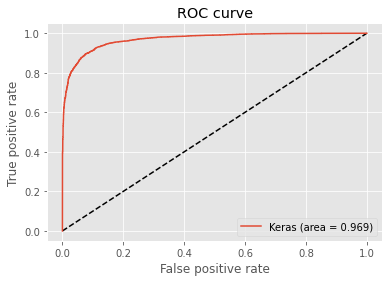

In [134]:
from sklearn.metrics import roc_curve
y_pred=model_stack_lstm.predict(x_testing)
fpr, tpr, thresholds = roc_curve(test_y, y_pred)
from sklearn.metrics import auc
auc_keras = auc(fpr, tpr)
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, label='Keras (area = {:.3f})'.format(auc_keras))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

In [135]:
from sklearn.metrics import roc_curve
from sklearn.metrics import classification_report
import numpy as np
fpr, tpr, thresholds = roc_curve(test_y, y_pred)
y=tpr-fpr
idx=np.argmax(y)#Youden_index
best_threshold=thresholds[idx]
print("The best threshold is",best_threshold)
print(classification_report(test_y, y_pred >best_threshold ,digits=4))

The best threshold is 0.586825
              precision    recall  f1-score   support

           0     0.9007    0.9241    0.9122      4162
           1     0.9198    0.8952    0.9073      4046

    accuracy                         0.9098      8208
   macro avg     0.9102    0.9096    0.9098      8208
weighted avg     0.9101    0.9098    0.9098      8208



In [136]:
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Bidirectional
from tensorflow.keras.layers import Dropout
bi_model=Sequential()
bi_model.add(Embedding(max_feature,64,input_length = 500))
bi_model.add(Bidirectional(LSTM(64,return_sequences=True)))
bi_model.add(Dropout(0.3))
bi_model.add(Bidirectional(LSTM(64))) #lstm with 100 neurons
bi_model.add(Dense(1,activation='sigmoid'))
bi_model.compile(loss='binary_crossentropy',optimizer=tf.keras.optimizers.Adam(3e-3),metrics=['accuracy'])
print(bi_model.summary())

Model: "sequential_17"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_16 (Embedding)     (None, 500, 64)           192000    
_________________________________________________________________
bidirectional_4 (Bidirection (None, 500, 128)          66048     
_________________________________________________________________
dropout_31 (Dropout)         (None, 500, 128)          0         
_________________________________________________________________
bidirectional_5 (Bidirection (None, 128)               98816     
_________________________________________________________________
dense_16 (Dense)             (None, 1)                 129       
Total params: 356,993
Trainable params: 356,993
Non-trainable params: 0
_________________________________________________________________
None


In [137]:
history = bi_model.fit(
    pad_sequences,train_y,
    batch_size= 64,
    epochs= 20,
    validation_split= 0.1,
    verbose=1,callbacks=[callback]
)

Epoch 1/20
462/462 [==============================] - 66s 127ms/step - loss: 0.2979 - accuracy: 0.8757 - val_loss: 0.2877 - val_accuracy: 0.8904
Epoch 2/20
462/462 [==============================] - 57s 124ms/step - loss: 0.1989 - accuracy: 0.9231 - val_loss: 0.2332 - val_accuracy: 0.9038
Epoch 3/20
462/462 [==============================] - 57s 124ms/step - loss: 0.1753 - accuracy: 0.9312 - val_loss: 0.2425 - val_accuracy: 0.9059
Epoch 4/20
462/462 [==============================] - 58s 125ms/step - loss: 0.1598 - accuracy: 0.9387 - val_loss: 0.2540 - val_accuracy: 0.9016
Epoch 5/20
462/462 [==============================] - 58s 125ms/step - loss: 0.1410 - accuracy: 0.9452 - val_loss: 0.2967 - val_accuracy: 0.9035
Epoch 6/20
462/462 [==============================] - 58s 125ms/step - loss: 0.1211 - accuracy: 0.9535 - val_loss: 0.2767 - val_accuracy: 0.9010
Epoch 7/20
462/462 [==============================] - 58s 125ms/step - loss: 0.1043 - accuracy: 0.9603 - val_loss: 0.3190 - val_ac

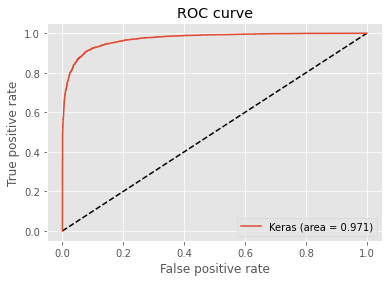

In [138]:
from sklearn.metrics import roc_curve
y_pred=bi_model.predict(x_testing)
fpr, tpr, thresholds = roc_curve(test_y, y_pred)
from sklearn.metrics import auc
auc_keras = auc(fpr, tpr)
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, label='Keras (area = {:.3f})'.format(auc_keras))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

In [139]:
from sklearn.metrics import roc_curve
from sklearn.metrics import classification_report
import numpy as np
fpr, tpr, thresholds = roc_curve(test_y, y_pred)
y=tpr-fpr
idx=np.argmax(y)#Youden_index
best_threshold=thresholds[idx]
print("The best threshold is",best_threshold)
print(classification_report(test_y, y_pred >best_threshold ,digits=4))

The best threshold is 0.43688783
              precision    recall  f1-score   support

           0     0.9097    0.9246    0.9171      4162
           1     0.9211    0.9056    0.9133      4046

    accuracy                         0.9152      8208
   macro avg     0.9154    0.9151    0.9152      8208
weighted avg     0.9153    0.9152    0.9152      8208

